# Deliverables

Your final submission will be three things:

A Github repo with your code and results, with instructions on how to run the code
A powerpoint presentation detailing your project and findings
A video presenting your presentation and code

### Option 1: Visual and Genre Classification

Data Processing: Easy
Modeling: Hard
Interactive: Medium <br>

This dataset is a unique collection of high-quality movie and series poster images from IMDB, meticulously handpicked to represent their respective genres accurately. Accompanying these images are detailed plot summaries, each containing more than 150 words, providing rich textual data for analysis.
<br>
The dataset focuses on four primary genres: Action, Comedy, Horror, and Romance. The combination of visual and textual data makes this dataset ideal for multimodal analysis and genre classification tasks. It offers an excellent opportunity for researchers and enthusiasts to delve into the world of movies and series, explore genre characteristics, and develop models that can understand and predict genre based on visual cues and plot descriptions. This dataset is a valuable resource for anyone interested in film studies, machine learning, and data science.
<br>
You are tasked to do the following:
<br>
1. Load in the data and analyze each column.
2. Clean the movie summary column in any way you see fit.
3. Build a summarization tool and summarize a few of the movies.
4. Build at least four models on the dataset. You must have at least one naive bayes model, one generalized linear model (ex: logistic regression), and one tensorflow model (ex: LSTM).
5. Evaulate the models in terms of overall accuracy and accuracy by genre.
6. For your tensorflow model(s), plot your models and plot accuracy over epoch number.
7. Show the most important words from each model and build a word cloud accompanying it.
8. Find movies that had a different prediction based on the model. Explain why you think those models predicted one genre vs. the other.
9. Build an interactive tool that can take a real or fake movie summary, clean the text, and predict the movie genre based on your models.
10. Add any other techniques taught from the course that could be applied for this project.
11. Present these findings in a 10 minute video with slides, sample code and a demonstration of your interactive tool.
12. BONUS (optional): extract the images and map them with the genre of movie. Build a model classifying the genre based on the movie images.

In [ ]:
# ! pip install kaggle
# ! pip install gdown
# ! apt-get install -y libgl1-mesa-glx

## 1. Data Loading

In [ ]:
# for local:
#! pip install kaggle
# import kaggle

# # Download latest version
# path = kagglehub.dataset_download("zulkarnainsaurav/imdb-multimodal-vision-and-nlp-genre-classification")

# print("Path to dataset files:", path)

In [2]:
import kagglehub
import pandas as pd
import numpy as np
import os
import cv2
import csv
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [3]:
# for colab - download the data

from google.colab import drive
import os

# Mount Google Drive if needed
drive.mount('/content/drive')

# Only download if the dataset folder doesn't already exist
if not os.path.exists("dataset"):
    # Install gdown (if not already installed)
    !pip install -U gdown

    # Download the dataset froSm shared Google Drive link via file ID
    !gdown --id 1o06RUiQJtQrAh2h28c4Ib_l_jeeAT3l6 --output dataset.zip

    # Unzip quietly into the "dataset" folder
    !unzip -q dataset.zip -d dataset/
else:
    print("'dataset/' folder already exists. Skipping download.")



Mounted at /content/drive
/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1o06RUiQJtQrAh2h28c4Ib_l_jeeAT3l6
From (redirected): https://drive.google.com/uc?id=1o06RUiQJtQrAh2h28c4Ib_l_jeeAT3l6&confirm=t&uuid=0662f096-9fe7-4df5-90ea-f57587d108e9
To: /content/dataset.zip
100% 58.8M/58.8M [00:01<00:00, 39.5MB/s]


In [4]:

# load dataset - eg: IMDB_four_genre_larger_plot_description
import pandas as pd

df = pd.read_csv("dataset/IMDB_four_genre_larger_plot_description.csv")  # Replace with actual CSV name
df.head()


,movie_id,description,genre
0,tt12783454,Elle Evans (Joey King) has finally completed h...,romance
1,tt1798632,A young girl tries to understand how she myste...,horror
2,tt9214832,"In 1800s England, a well meaning but selfish y...",comedy
3,tt8522006,Abby Holland (Kristen Stewart) and Harper Cald...,romance
4,tt21249656,Olga and Maks are 15 years apart. She is a suc...,romance


In [5]:
# Set paths after unzip
DATA_DIR = "dataset/IMDB four_genre_posters"
CSV_FILE = "dataset/IMDB four_genre_larger_plot_description.csv"
IMAGE_SIZE = (128, 192)
GENRES = ['Comedy', 'Horror', 'Romance', 'Action']

In [ ]:
# image_path = os.path.join(DATA_DIR, genre, filename)

In [ ]:
# # 1. Load Descriptions from CSV
# def load_descriptions(csv_file):
#     """
#     Load the movie descriptions from the CSV file
#     into a dictionary keyed by movie_id
#     """
#     descriptions = {}
#     with open(csv_file, 'r') as csvfile:
#         csv_reader = csv.DictReader(csvfile)
#         for row in csv_reader:
#             movie_id = row['movie_id'].strip()
#             description = row['description'].strip()
#             descriptions[movie_id] = description
#     return descriptions

# image_descriptions = load_descriptions(CSV_FILE)


# # 2. Load and Preprocess a Single Image
# def load_image(image_path, target_size=IMAGE_SIZE):
#     """
#     Load a grayscale image, resize it, and normalize pixel values to [0, 1].
#     """
#     try:
#         image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
#         if image is not None:
#             image = cv2.resize(image, target_size)
#             return image / 255.0
#         else:
#             print(f"[Warning] Failed to load image: {image_path}")
#             return None
#     except Exception as e:
#         print(f"[Error] Processing image {image_path}: {str(e)}")
#         return None


# # 3. Load the Full Dataset (Images + Labels)
# def load_dataset(image_dir, descriptions_dict, genres=GENRES):
#     """
#     Load images and labels, filter out entries with no matching description.
#     Returns: image array, label array, id array
#     """
#     images, labels, movie_ids = [], [], []

#     # Initialize label encoder
#     label_encoder = LabelEncoder()
#     label_encoder.fit(genres)
#     print("Class to Label Mapping:", dict(zip(genres, label_encoder.transform(genres))))

#     # Traverse genre folders
#     for genre in genres:
#         genre_path = os.path.join(image_dir, genre)
#         for filename in os.listdir(genre_path):
#             movie_id = filename.replace('.jpg', '').strip()
#             full_path = os.path.join(genre_path, filename)
#             image = load_image(full_path)

#             if image is not None and movie_id in descriptions_dict:
#                 images.append(image)
#                 labels.append(label_encoder.transform([genre])[0])
#                 movie_ids.append(movie_id)

#     return np.array(images), np.array(labels), np.array(movie_ids)

In [6]:
# data, labels, ids = load_dataset(DATA_DIR, image_descriptions)
# print(data.shape, labels.shape, ids.shape)

In [ ]:
# Load image descriptiond
# image_descriptions = load_descriptions(CSV_FILE)

In [7]:
# Load the poster pixel data

# Check if file already exists
if not os.path.exists("imdb_posters.npz"):
    # Install gdown if needed
    !pip install -U -q gdown

    # Download the file using the file ID from the shareable link
    # Your link: https://drive.google.com/file/d/1NWTzNRxoYgj0IXYvZm7kAcQ0ljbb-6re/view?usp=sharing
    # Extract the ID: 1NWTzNRxoYgj0IXYvZm7kAcQ0ljbb-6re
    !gdown --id 1NWTzNRxoYgj0IXYvZm7kAcQ0ljbb-6re --output imdb_posters.npz

    print("Downloaded imdb_posters.npz")
else:
    print("imdb_posters.npz already exists. Skipping download.")

# Load compressed NumPy archive
npzfile = np.load("imdb_posters.npz", allow_pickle=True)

# Preview keys in the archive
print("Contents of NPZ file:", npzfile.files)



/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1NWTzNRxoYgj0IXYvZm7kAcQ0ljbb-6re
To: /content/imdb_posters.npz
100% 22.6M/22.6M [00:00<00:00, 77.3MB/s]
Downloaded imdb_posters.npz
Contents of NPZ file: ['data', 'labels', 'ids']


In [8]:
# Load compressed NumPy archive
npzfile = np.load("imdb_posters.npz", allow_pickle=True)

data = npzfile['data']
labels = npzfile['labels']
ids = npzfile['ids']

print(data.shape, labels.shape, ids.shape)

(724, 192, 128) (724,) (724,)


In [9]:
data

array([[[0.09803922, 0.08627451, 0.10196078, ..., 0.10588235,
         0.10588235, 0.10588235],
        [0.10196078, 0.08627451, 0.09411765, ..., 0.10588235,
         0.10588235, 0.10588235],
        [0.10588235, 0.08627451, 0.09019608, ..., 0.10588235,
         0.10588235, 0.10588235],
        ...,
        [0.08235294, 0.05098039, 0.04313725, ..., 0.04705882,
         0.03921569, 0.08627451],
        [0.08235294, 0.01568627, 0.02352941, ..., 0.01960784,
         0.01960784, 0.07058824],
        [0.02745098, 0.02745098, 0.02745098, ..., 0.03921569,
         0.05098039, 0.03529412]],

       [[0.78431373, 0.78823529, 0.79215686, ..., 0.85882353,
         0.8627451 , 0.8627451 ],
        [0.76862745, 0.77647059, 0.77647059, ..., 0.83921569,
         0.84313725, 0.84313725],
        [0.76078431, 0.76470588, 0.76862745, ..., 0.82745098,
         0.83137255, 0.83137255],
        ...,
        [0.12156863, 0.07843137, 0.12941176, ..., 0.26666667,
         0.1372549 , 0.10980392],
        [0.0

##### Data
- 724 images, size as 192 * 128
- each image as a 2D NumPy array with normalized pixel ranging in [0.0, 1.0] <br>

##### Label
- one label per image, as integer of 1 to 4

##### Movie IDs

##### Movie Description
- dictionary with movie id as key, movie description as value

## 2. Movie Description Cleaning


In [10]:
!pip install contractions


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 14.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.3/118.3 kB 12.4 MB/s eta 0:00:00


In [11]:
# Movie Description Cleaning
import re, string, nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from tqdm.auto import tqdm
import contractions

nltk.download('stopwords')

stop_words = set(stopwords.words("english"))
lemmatizer = WordNetLemmatizer()
punct_tbl  = str.maketrans("", "", string.punctuation)


def clean_text(text: str) -> str:
    if not isinstance(text, str):
        return ""
    text = contractions.fix(text) # "doesn't" → "does not"
    text = text.strip().lower() # convert to lower case letters
    text = re.sub(r"[^a-z\s]", "", text) # keep only English letters
    text = re.sub(r"(https?://\S+|www\.\S+|\S+@\S+)", " ", text)  # drop URLs & e-mails
    text = re.sub(r"\b\d+\b", " ", text)                          # replace standalone numbers with space
    text = text.translate(punct_tbl)                              # punctuation

    # drop stop words
    words = text.split()
    words = [w for w in words if w not in stop_words]
    cleaned = " ".join(words)

    return re.sub(r"\s{2,}", " ", cleaned).strip()

# def tokenize_and_lemmatise(text: str) -> list[str]:
#     tokens = word_tokenize(text)
#     tokens = [t for t in tokens if t not in stop_words]
#     return [lemmatizer.lemmatize(t) for t in tokens]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [12]:
df["cleaned_description"] = df["description"].apply(clean_text)

In [ ]:
df[df["movie_id"] == "tt12783454"]["cleaned_description"].values[0] # test case

'elle evans joey king finally completed high school goes road trip week noah flynn jacob elordi lee flynn joel courtney rachel meganne young elle finally decide future unluckily enough elle got accepted two schools harvard berkeley noah got harvard lee berkeley lie saying got waitlisted crush feelings unforgettable adventures camping fishing watching shooting star going aquarium watching sunset although lee elle rule saying must always go school bestie decides think later leave san francisco embarking amazing adventures together unfortunately road trip comes end elle got job waiter get money college despite knowing one go days later noah elle flynns summer house noah asks unexpected question harvard suggested elle gets wait list could go campus get apartment together eventually lee ends jumping balcony drenching noah elle water rachel comes hands drinks elle still ignoring schools buy time noah elle leave lee rachel talk college plans later day lunch mr mrs flynn lee mentions go beach 

In [ ]:
# # Load movie descriptions as dictionary
# description_dict = dict(zip(df['movie_id'], df['description']))
# print(description_dict['tt12783454'][:100]) # testting

# # Get descriptions that match image ids
# matched_descriptions = [description_dict[movie_id] for movie_id in ids]


## 3. Movie Description Summarization Tool - Build a summarization tool and summarize a few of the movies.

In [ ]:
# !pip install transformers

In [ ]:
from transformers import PegasusTokenizer, PegasusForConditionalGeneration
from transformers import pipeline

# Load Pegasus
model_name = "google/pegasus-cnn_dailymail"
summarizer = pipeline("summarization", model=model_name, tokenizer=model_name)


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/1.12k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/2.28G [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/2.28G [00:00<?, ?B/s]

Some weights of PegasusForConditionalGeneration were not initialized from the model checkpoint at google/pegasus-cnn_dailymail and are newly initialized: ['model.decoder.embed_positions.weight', 'model.encoder.embed_positions.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


generation_config.json:   0%|          | 0.00/280 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/88.0 [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/1.91M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/65.0 [00:00<?, ?B/s]

Device set to use cpu


In [ ]:
def summarize_with_pegasus(text, max_length=120, min_length=30):
    text = text.strip().replace("\n", " ")
    # Truncate to avoid exceeding token limit (~1024 tokens)
    if len(text.split()) > 500:
        text = " ".join(text.split()[:500])

    summary = summarizer(text, max_length=max_length, min_length=min_length, do_sample=False)
    return summary[0]['summary_text']


In [ ]:
example_text = df[df['movie_id'] == 'tt12783454']['description'].values[0]
print("Pegasus Summary:\n")
print(summarize_with_pegasus(example_text))


Pegasus Summary:

Elle Evans (Joey King) has finally completed high school and goes on a road trip for a week with Noah Flynn (Jacob Elordi), Lee Flynn (Joel Courtney), and Rachel (Meganne Young)<n>Unluckily enough, Elle got accepted into two schools: Harvard and Berkeley.<n>Now, Elle needs to decide, whether she goes with Noah to Harvard or to Berkeley with Lee.


In [ ]:
example_text = df[df['movie_id'] == 'tt12783454']['cleaned_description'].values[0]
print("Pegasus Summary:\n")
print(summarize_with_pegasus(example_text))

Pegasus Summary:

elle evans finally completed high school goes road noah flynn jacob elordi lee flynn joel courtney nne young elle finally decide enough elle got accepted two schools berkeley fishing noah got lee lee lying saying got waitlisted crush feelings unforgettable adventures .


## 4+5. Build at least four models on the dataset. You must have at least one naive bayes model, one generalized linear model (ex: logistic regression), and one tensorflow model (ex: LSTM) & Evaulate the models in terms of overall accuracy and accuracy by genre.


In [ ]:
!pip install -q scikit-learn pandas
!pip install --upgrade transformers datasets

In [13]:
import pandas as pd
import numpy as np
import re
import torch
import tensorflow as tf

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dropout

from transformers import DistilBertTokenizerFast, DistilBertForSequenceClassification, Trainer, TrainingArguments
from datasets import Dataset

- preprocess

In [14]:
# Label encoding
le = LabelEncoder()
df["label"] = le.fit_transform(df["genre"])  # 0–3 for 4 genres

# Split text and labels
X = df["cleaned_description"]
y = df["label"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)


* model 1:  Naive Bayes (required) + Logisitc Regression (required)

### Why Naive Bayes and Logistic Regression do NOT use tokenized sequences
They operate on vectorized text features, like from TfidfVectorizer, not raw tokens or sequences.

These are linear models and require fixed-length feature vectors (not sequences).

So instead of using sequences of word indices (like [4, 98, 23, ...]), they use a term-document matrix generated by:

In [22]:
# TF-IDF vectorizer
vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1, 2))
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Naive Bayes
nb_model = MultinomialNB().fit(X_train_vec, y_train)
y_pred_nb = nb_model.predict(X_test_vec)

# Logistic Regression
lr_model = LogisticRegression(max_iter=1000).fit(X_train_vec, y_train)
y_pred_lr = lr_model.predict(X_test_vec)

# Evaluation
print("=== Naive Bayes ===")
print(classification_report(y_test, y_pred_nb, target_names=le.classes_))

print("=== Logistic Regression ===")
print(classification_report(y_test, y_pred_lr, target_names=le.classes_))


=== Naive Bayes ===
              precision    recall  f1-score   support

      action       0.78      0.86      0.82        50
      comedy       0.64      0.46      0.53        50
      horror       0.76      0.78      0.77        50
     romance       0.64      0.74      0.69        50

    accuracy                           0.71       200
   macro avg       0.71      0.71      0.70       200
weighted avg       0.71      0.71      0.70       200

=== Logistic Regression ===
              precision    recall  f1-score   support

      action       0.75      0.88      0.81        50
      comedy       0.63      0.66      0.65        50
      horror       0.84      0.72      0.77        50
     romance       0.72      0.66      0.69        50

    accuracy                           0.73       200
   macro avg       0.73      0.73      0.73       200
weighted avg       0.73      0.73      0.73       200



* model 3: LSTM / BiLSTM (required - TensorFlow)


Epoch 1/5
23/23 ━━━━━━━━━━━━━━━━━━━━ 28s 500ms/step - accuracy: 0.2490 - loss: 1.3877 - val_accuracy: 0.3750 - val_loss: 1.3755
Epoch 2/5
23/23 ━━━━━━━━━━━━━━━━━━━━ 16s 354ms/step - accuracy: 0.2938 - loss: 1.3744 - val_accuracy: 0.3625 - val_loss: 1.3667
Epoch 3/5
23/23 ━━━━━━━━━━━━━━━━━━━━ 16s 604ms/step - accuracy: 0.3424 - loss: 1.3660 - val_accuracy: 0.4375 - val_loss: 1.3199
Epoch 4/5
23/23 ━━━━━━━━━━━━━━━━━━━━ 19s 522ms/step - accuracy: 0.5116 - loss: 1.2196 - val_accuracy: 0.5250 - val_loss: 1.0703
Epoch 5/5
23/23 ━━━━━━━━━━━━━━━━━━━━ 20s 477ms/step - accuracy: 0.6330 - loss: 0.8504 - val_accuracy: 0.5500 - val_loss: 1.0218
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 70ms/step - accuracy: 0.5130 - loss: 1.1269
LSTM Accuracy: 0.4600


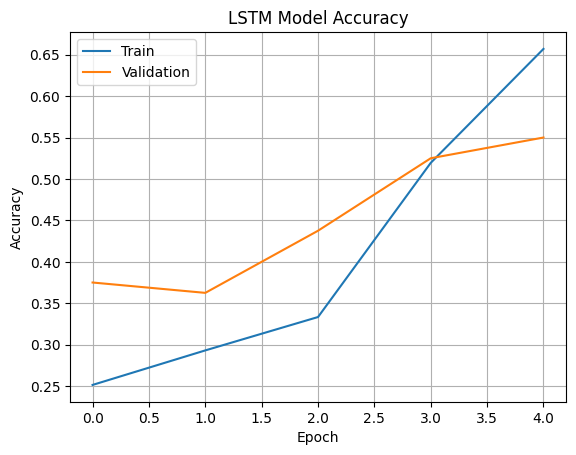

In [23]:
keras_tokenizer = Tokenizer(num_words=10000, oov_token="<OOV>")
keras_tokenizer.fit_on_texts(X)

X_seq = keras_tokenizer.texts_to_sequences(X)
X_seq = pad_sequences(X_seq, maxlen=300)

X_seq_train, X_seq_test, y_seq_train, y_seq_test = train_test_split(X_seq, y, test_size=0.2, stratify=y, random_state=42)

lstm_model = Sequential([
    Embedding(input_dim=10000, output_dim=64),
    Bidirectional(LSTM(64, return_sequences=False)),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(4, activation='softmax')
])

lstm_model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = lstm_model.fit(
    X_seq_train, y_seq_train,
    epochs=5,
    validation_split=0.1,
    batch_size=32
)
# 3. Evaluate the model
lstm_loss, lstm_acc = lstm_model.evaluate(X_seq_test, y_seq_test)
print(f"LSTM Accuracy: {lstm_acc:.4f}")

# 4. Plot accuracy over epochs
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('LSTM Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


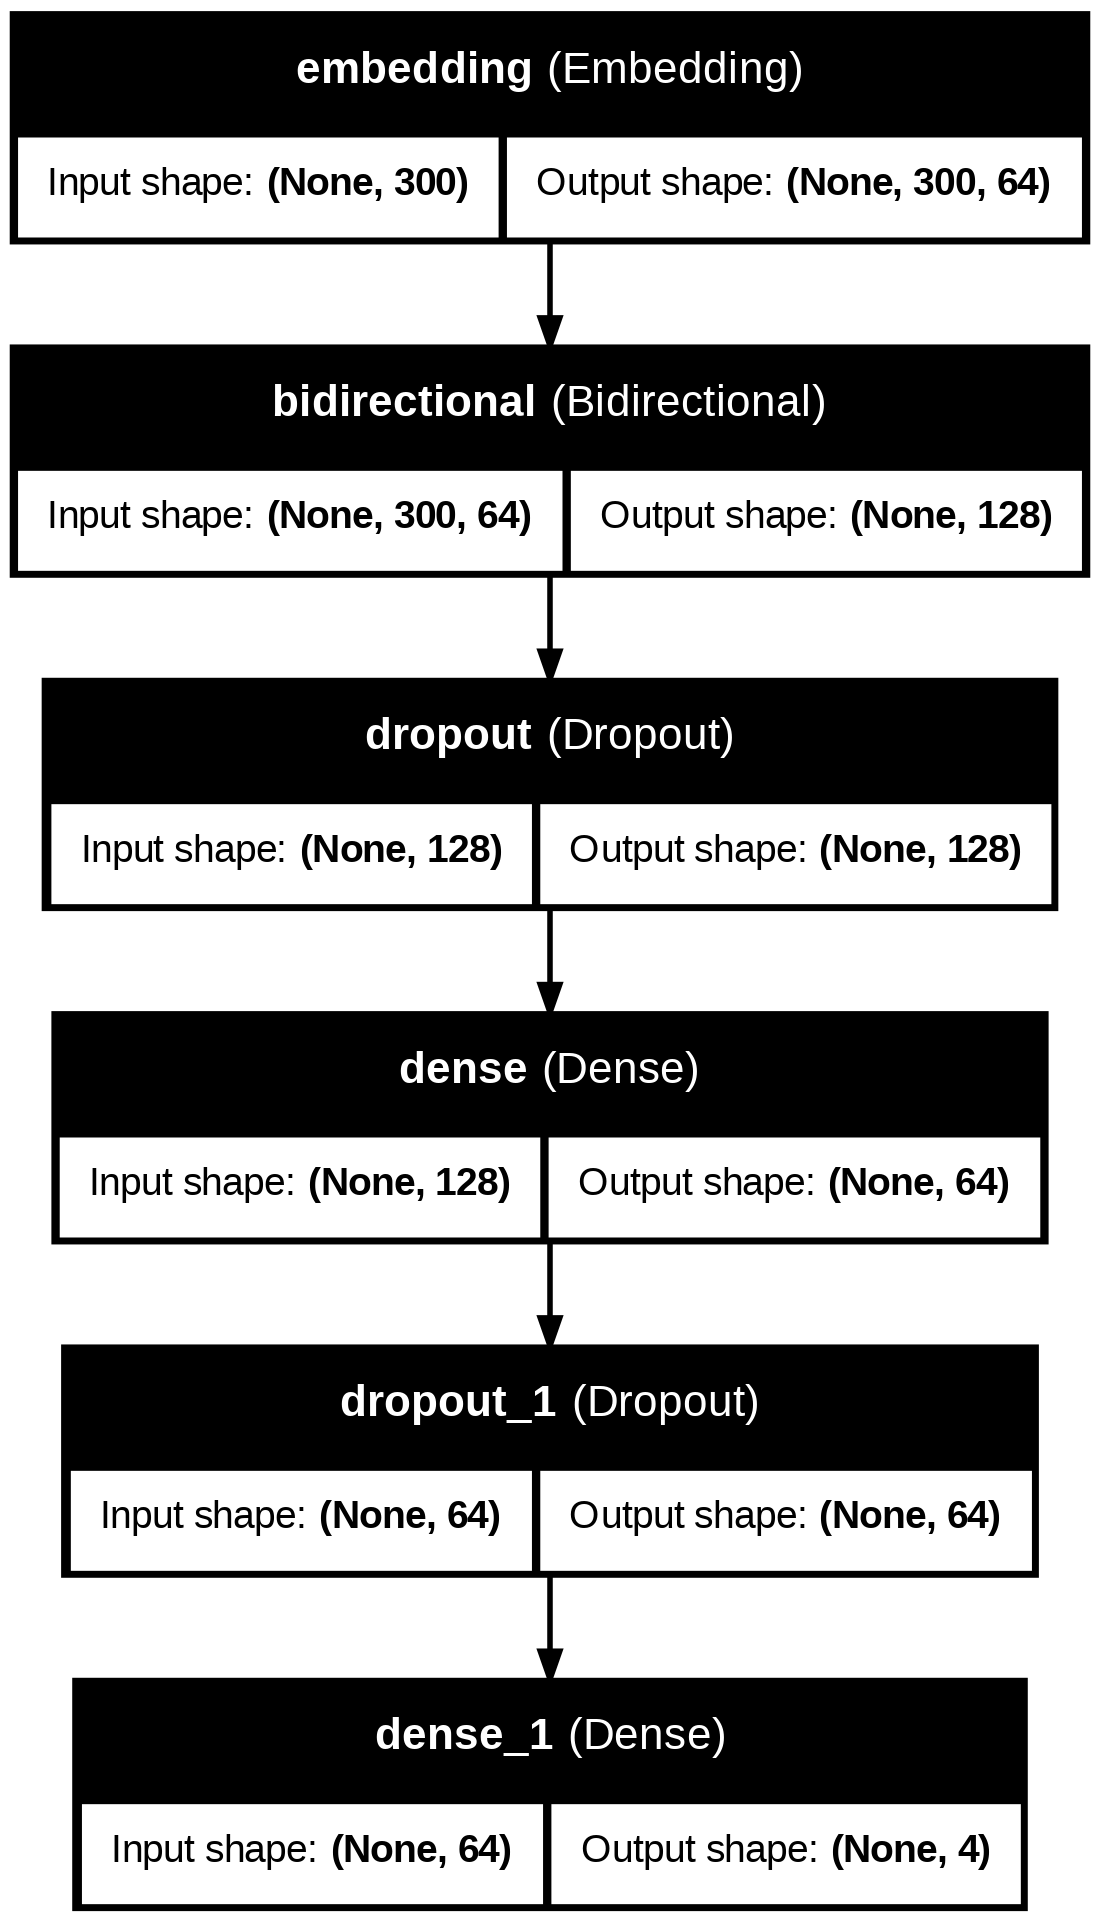

In [24]:
# plot model
from tensorflow.keras.utils import plot_model

# Plot model architecture
plot_model(lstm_model, to_file="lstm_model_architecture.png", show_shapes=True, show_layer_names=True)


In [16]:
from transformers import DistilBertTokenizerFast, DistilBertForSequenceClassification, Trainer, TrainingArguments
from sklearn.model_selection import train_test_split
from datasets import Dataset
import os
# Initialize trainer and train
from transformers import DataCollatorWithPadding

os.environ["WANDB_DISABLED"] = "true"
# Tokenizer and model
hf_tokenizer = DistilBertTokenizerFast.from_pretrained('distilbert-base-uncased')

# Train-test split
train_texts, val_texts, train_labels, val_labels = train_test_split(
    X.tolist(), y.tolist(), test_size=0.2, stratify=y, random_state=42
)


train_enc = hf_tokenizer(train_texts, truncation=True, padding=True, max_length=256)
val_enc = hf_tokenizer(val_texts, truncation=True, padding=True, max_length=256)

# Create Hugging Face datasets
train_dataset = Dataset.from_dict({
    'input_ids': train_enc['input_ids'],
    'attention_mask': train_enc['attention_mask'],
    'labels': train_labels
})
val_dataset = Dataset.from_dict({
    'input_ids': val_enc['input_ids'],
    'attention_mask': val_enc['attention_mask'],
    'labels': val_labels
})

# Load model
hf_model = DistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased', num_labels=4)

# Define training arguments
training_args = TrainingArguments(
    output_dir="./results",
    do_train=True,
    do_eval=True,
    logging_dir='./logs',
    logging_steps=20,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=3,
    learning_rate=2e-5,
    weight_decay=0.01
)

data_collator = DataCollatorWithPadding(tokenizer=hf_tokenizer)

trainer = Trainer(
    model=hf_model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    data_collator=data_collator,  # ← new
)


trainer.train()



Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Using the `WANDB_DISABLED` environment variable is deprecated and will be removed in v5. Use the --report_to flag to control the integrations used for logging result (for instance --report_to none).


Step,Training Loss
20,1.381200
40,1.315500
60,1.201000
80,1.006100
100,0.899900
120,0.829800
140,0.782800


TrainOutput(global_step=150, training_loss=1.0373131529490154, metrics={'train_runtime': 56.3016, 'train_samples_per_second': 42.628, 'train_steps_per_second': 2.664, 'total_flos': 158966548070400.0, 'train_loss': 1.0373131529490154, 'epoch': 3.0})

* model 4: Transformer - DistilBERT or BERT (fine-tuned)

In [17]:

eval_results = trainer.evaluate()
print(eval_results)



{'eval_loss': 0.7909554839134216, 'eval_runtime': 1.3648, 'eval_samples_per_second': 146.541, 'eval_steps_per_second': 9.525, 'epoch': 3.0}


# save & load models

In [26]:
# save models: Naive Bayes & Logistic Regression (Scikit-Learn)

import joblib

joblib.dump(nb_model, "naive_bayes_model.pkl")
joblib.dump(lr_model, "logistic_regression_model.pkl")
joblib.dump(vectorizer, "tfidf_vectorizer.pkl")

# load
nb_model = joblib.load("naive_bayes_model.pkl")
lr_model = joblib.load("logistic_regression_model.pkl")
vectorizer = joblib.load("tfidf_vectorizer.pkl")


In [25]:
# save models: LSTM (Keras)

lstm_model.save("lstm_model.keras")  # or .h5 for legacy format




In [27]:
from tensorflow.keras.models import load_model
lstm_model = load_model("lstm_model.keras")

import json

# Save tokenizer
token_json = keras_tokenizer.to_json()
with open("lstm_tokenizer.json", "w") as f:
    f.write(token_json)

from tensorflow.keras.preprocessing.text import tokenizer_from_json

with open("lstm_tokenizer.json") as f:
    keras_tokenizer = tokenizer_from_json(f.read())

In [18]:
# save models: Transformer (Hugging Face DistilBERT)

hf_model.save_pretrained("bert_model/", safe_serialization=False)

hf_tokenizer.save_pretrained("bert_model/")


('bert_model/tokenizer_config.json',
 'bert_model/special_tokens_map.json',
 'bert_model/vocab.txt',
 'bert_model/added_tokens.json',
 'bert_model/tokenizer.json')

In [19]:
from transformers import DistilBertTokenizerFast, DistilBertForSequenceClassification

hf_tokenizer = DistilBertTokenizerFast.from_pretrained("/content/bert_model")
hf_model = DistilBertForSequenceClassification.from_pretrained("/content/bert_model")

# Find movies that had a different prediction based on the model. Explain why you think those models predicted one genre vs. the other.

In [ ]:
# Prepare comparison DataFrame
df_test = X_test.reset_index(drop=True).to_frame()
df_test['true_label'] = le.inverse_transform(y_test)
df_test['nb_pred'] = le.inverse_transform(y_pred_nb)
df_test['lr_pred'] = le.inverse_transform(y_pred_lr)

# Convert X_test to tokenized & padded sequences for LSTM
X_test_seq = keras_tokenizer.texts_to_sequences(X_test)
X_test_seq_padded = pad_sequences(X_test_seq, maxlen=300)

# Predict with LSTM
lstm_preds = tf.argmax(lstm_model.predict(X_test_seq_padded), axis=1).numpy()
df_test['lstm_pred'] = le.inverse_transform(lstm_preds)

# BERT batch prediction
def predict_bert_batch(texts):
    inputs = hf_tokenizer(texts, return_tensors="pt", truncation=True, padding=True, max_length=256)
    with torch.no_grad():
        outputs = hf_model(**inputs)
    return torch.argmax(outputs.logits, dim=1).numpy()

bert_preds = []
batch_size = 32
for i in range(0, len(X_test), batch_size):
    batch_texts = X_test.iloc[i:i+batch_size].tolist()
    bert_preds.extend(predict_bert_batch(batch_texts))

df_test['bert_pred'] = le.inverse_transform(bert_preds)




7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 151ms/step


In [ ]:
df_diff = df_test[
    (df_test['nb_pred'] != df_test['true_label']) |
    (df_test['lr_pred'] != df_test['true_label']) |
    (df_test['lstm_pred'] != df_test['true_label']) |
    (df_test['bert_pred'] != df_test['true_label'])
]

from IPython.display import display
display(df_diff.head(10))


,cleaned_description,true_label,nb_pred,lr_pred,lstm_pred,bert_pred
0,police raid house el paso find full dead latin...,horror,action,action,horror,horror
2,mans quotidian world suddenly disrupted strang...,romance,romance,romance,horror,romance
4,divorced couple teams travels bali stop daught...,romance,romance,romance,romance,comedy
5,next installment survivors ghostface killings ...,horror,horror,comedy,horror,horror
6,elle evans joey king finally completed high sc...,romance,romance,comedy,romance,comedy
7,landing gig lifetime new york jazz pianist sud...,comedy,romance,comedy,comedy,comedy
8,life luca spinoff movie based television serie...,comedy,romance,comedy,comedy,comedy
11,city doctor forced work remote alaskan town ci...,comedy,romance,comedy,horror,romance
12,lines love obsession blur romantic thriller pa...,romance,romance,romance,comedy,romance
13,accused inhibited exboyfriend violinist create...,romance,romance,romance,comedy,romance


Explain why you think those models predicted one genre vs. the other.

# Build an interactive tool that can take a real or fake movie summary, clean the text, and predict the movie genre based on your models.

In [ ]:
def predict_genre(summary):
    import re
    import torch

    # ── 1. Clean text ─────────────────────
    cleaned = re.sub(r"[^\w\s]", "", summary.lower())

    # ── 2. Naive Bayes ─────────────────────
    vec = vectorizer.transform([cleaned])
    nb_result = le.inverse_transform(nb_model.predict(vec))[0]

    # ── 3. Logistic Regression ─────────────
    lr_result = le.inverse_transform(lr_model.predict(vec))[0]

    # ── 4. LSTM ────────────────────────────
    seq = keras_tokenizer.texts_to_sequences([cleaned])
    padded = pad_sequences(seq, maxlen=300)
    l# cdownload the bertmodel
!zip -r bert_model.zip /content/bert_model

from google.colab import files
files.download("bert_model.zip")
stm_pred = tf.argmax(lstm_model.predict(padded, verbose=0), axis=1).numpy()[0]
    lstm_result = le.inverse_transform([lstm_pred])[0]

    # ── 5. Transformer (DistilBERT) ────────
    bert_inputs = hf_tokenizer(cleaned, return_tensors="pt", truncation=True, padding=True, max_length=256)
    with torch.no_grad():
        bert_outputs = hf_model(**bert_inputs)
    bert_pred = torch.argmax(bert_outputs.logits, dim=1).item()
    bert_result = le.inverse_transform([bert_pred])[0]

    # ── 6. Print and return results ────────
    print("Predicted Genres:")
    print(f"  Naive Bayes         : {nb_result}")
    print(f"  Logistic Regression : {lr_result}")
    print(f"  LSTM                : {lstm_result}")
    print(f"  Transformer (BERT)  : {bert_result}")

    return {
        "Naive Bayes": nb_result,
        "Logistic Regression": lr_result,
        "LSTM": lstm_result,
        "Transformer": bert_result
    }



In [ ]:
predict_genre("A young woman discovers a mysterious portal that leads her into a battle between light and darkness.")


Predicted Genres:
  Naive Bayes         : horror
  Logistic Regression : horror
  LSTM                : action
  Transformer (BERT)  : horror


{'Naive Bayes': 'horror',
 'Logistic Regression': 'horror',
 'LSTM': 'action',
 'Transformer': 'horror'}

Explain why you think those models predicted one genre vs. the other.


In [ ]:
# cdownload the bertmodel
!zip -r bert_model.zip /content/bert_model

from google.colab import files
files.download("bert_model.zip")


  adding: content/bert_model/ (stored 0%)
  adding: content/bert_model/vocab.txt (deflated 53%)
  adding: content/bert_model/tokenizer_config.json (deflated 75%)
  adding: content/bert_model/config.json (deflated 50%)
  adding: content/bert_model/tokenizer.json (deflated 71%)
  adding: content/bert_model/pytorch_model.bin

In [ ]:
# only contains pixel data to predict
import numpy as np
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# Expand grayscale to (H, W, 1)
X = np.expand_dims(data, axis=-1)  # Now shape is (724, 192, 128, 1)

# One-hot encode labels
le = LabelEncoder()
y = le.fit_transform(labels)
y_cat = to_categorical(y, num_classes=4)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y_cat, test_size=0.2, stratify=y, random_state=42)

# build simple CNN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(192, 128, 1)),
    MaxPooling2D((2,2)),
    BatchNormalization(),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    BatchNormalization(),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),

    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(4, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    batch_size=32,
    epochs=10
)

# accuracy plot

import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')
plt.title('Image Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 190, 126, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 95, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 95, 63, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 93, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 46, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 46, 30, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 44, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 22, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 39424)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     5,046,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,139,972 (19.61 MB)

 Trainable params: 5,139,780 (19.61 MB)

 Non-trainable params: 192 (768.00 B)

Epoch 1/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 36s 2s/step - accuracy: 0.3028 - loss: 17.7166 - val_accuracy: 0.2966 - val_loss: 1.4384
Epoch 2/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 40s 2s/step - accuracy: 0.3806 - loss: 1.2889 - val_accuracy: 0.3103 - val_loss: 1.3900
Epoch 3/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 40s 2s/step - accuracy: 0.4351 - loss: 1.2014 - val_accuracy: 0.1655 - val_loss: 1.4281
Epoch 4/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - accuracy: 0.4384 - loss: 1.2298 - val_accuracy: 0.2552 - val_loss: 1.3810
Epoch 5/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 42s 2s/step - accuracy: 0.4822 - loss: 1.1745 - val_accuracy: 0.3448 - val_loss: 1.3793
Epoch 6/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 39s 2s/step - accuracy: 0.4669 - loss: 1.1368 - val_accuracy: 0.3448 - val_loss: 1.3757
Epoch 7/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 32s 2s/step - accuracy: 0.5200 - loss: 1.1030 - val_accuracy: 0.3586 - val_loss: 1.3780
Epoch 8/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - accuracy: 0.4634 - loss: 1.1452 - val_accuracy: 0.2207 - val_loss

# contains both description data & pixel data

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ image_input         │ (None, 192, 128,  │          0 │ -                 │
│ (InputLayer)        │ 1)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_5 (Conv2D)   │ (None, 190, 126,  │        320 │ image_input[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_5     │ (None, 95, 63,    │          0 │ conv2d_5[0][0]    │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 95, 63,    │        128 │ max_pooling2d_5[… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ text_input          │ (None, 300)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_6 (Conv2D)   │ (None, 93, 61,    │     18,496 │ batch_normalizat… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_1         │ (None, 300, 128)  │  1,280,000 │ text_input[0][0]  │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_6     │ (None, 46, 30,    │          0 │ conv2d_6[0][0]    │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_1 (LSTM)       │ (None, 64)        │     49,408 │ embedding_1[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_2 (Flatten) │ (None, 88320)     │          0 │ max_pooling2d_6[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_6 (Dense)     │ (None, 64)        │      4,160 │ lstm_1[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_7 (Dense)     │ (None, 64)        │  5,652,544 │ flatten_2[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_1       │ (None, 128)       │          0 │ dense_6[0][0],    │
│ (Concatenate)       │                   │            │ dense_7[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_8 (Dense)     │ (None, 64)        │      8,256 │ concatenate_1[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_2 (Dropout) │ (None, 64)        │          0 │ dense_8[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_9 (Dense)     │ (None, 4)         │        260 │ dropout_2[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 7,013,572 (26.75 MB)

 Trainable params: 7,013,508 (26.75 MB)

 Non-trainable params: 64 (256.00 B)

Epoch 1/4
19/19 ━━━━━━━━━━━━━━━━━━━━ 34s 2s/step - accuracy: 0.3172 - loss: 4.9785 - val_accuracy: 0.3310 - val_loss: 1.3839
Epoch 2/4
19/19 ━━━━━━━━━━━━━━━━━━━━ 39s 1s/step - accuracy: 0.3492 - loss: 1.5867 - val_accuracy: 0.3586 - val_loss: 1.3507
Epoch 3/4
19/19 ━━━━━━━━━━━━━━━━━━━━ 42s 1s/step - accuracy: 0.4284 - loss: 1.1951 - val_accuracy: 0.4207 - val_loss: 1.3090
Epoch 4/4
19/19 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.5299 - loss: 1.1165 - val_accuracy: 0.3586 - val_loss: 1.3301


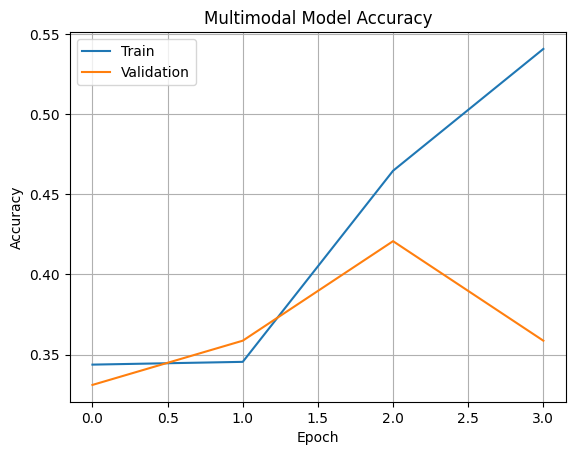

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re, string
import nltk
from tensorflow.keras.models import Model
from tensorflow.keras.layers import (Input, Embedding, LSTM, Dense, Dropout,
                                     Conv2D, MaxPooling2D, Flatten, concatenate, BatchNormalization)
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from nltk.corpus import stopwords
import contractions

# --- 4. Align Descriptions with Image IDs ---
df_filtered = df[df["movie_id"].isin(ids)].copy()
df_filtered = df_filtered.set_index("movie_id").loc[ids].reset_index()

# --- 5. Text Tokenization ---
tokenizer = Tokenizer(num_words=10000, oov_token="<OOV>")
tokenizer.fit_on_texts(df_filtered["cleaned_description"])

X_txt = tokenizer.texts_to_sequences(df_filtered["cleaned_description"])
X_txt = pad_sequences(X_txt, maxlen=300)

# --- 6. Label Encoding ---
le = LabelEncoder()
y = le.fit_transform(df_filtered["genre"])
y_cat = to_categorical(y, num_classes=4)

# --- 7. Train/Test Split ---
X_txt_train, X_txt_val, X_img_train, X_img_val, y_train, y_val = train_test_split(
    X_txt, X_img, y_cat, test_size=0.2, stratify=y, random_state=42
)

# --- 8. Define Multimodal Model ---
# TEXT branch
text_input = Input(shape=(300,), name='text_input')
x_txt = Embedding(input_dim=10000, output_dim=128)(text_input)
x_txt = LSTM(64)(x_txt)
x_txt = Dense(64, activation='relu')(x_txt)

# IMAGE branch
image_input = Input(shape=(192, 128, 1), name='image_input')
x_img = Conv2D(32, (3,3), activation='relu')(image_input)
x_img = MaxPooling2D((2,2))(x_img)
x_img = BatchNormalization()(x_img)
x_img = Conv2D(64, (3,3), activation='relu')(x_img)
x_img = MaxPooling2D((2,2))(x_img)
x_img = Flatten()(x_img)
x_img = Dense(64, activation='relu')(x_img)

# Combine
combined = concatenate([x_txt, x_img])
x = Dense(64, activation='relu')(combined)
x = Dropout(0.5)(x)
output = Dense(4, activation='softmax')(x)

model = Model(inputs=[text_input, image_input], outputs=output)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

# --- 9. Train the Model ---
history = model.fit(
    [X_txt_train, X_img_train], y_train,
    validation_data=([X_txt_val, X_img_val], y_val),
    batch_size=32,
    epochs=4
)

# --- 10. Plot Accuracy ---
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Multimodal Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()




NameError: name 'model' is not defined

  adding: content/bert_model/ (stored 0%)
  adding: content/bert_model/tokenizer.json (deflated 71%)
  adding: content/bert_model/tokenizer_config.json (deflated 75%)
  adding: content/bert_model/model.safetensors (deflated 8%)
  adding: content/bert_model/special_tokens_map.json (deflated 42%)
  adding: content/bert_model/config.json (deflated 50%)
  adding: content/bert_model/vocab.txt (deflated 53%)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>